<a href="https://colab.research.google.com/github/Areeff10/brain_tumor_classification_cnn/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
areefkhan10_brain_tumor_dataset_path = kagglehub.dataset_download('areefkhan10/brain-tumor-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(224).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image (61).jpg
/kaggle/input/brain-tumor-dataset/Training/no_tumor/image(173).jpg
/kaggle/

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [ ]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-dataset/Training',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),  # Resize images
    shuffle=True
)

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-dataset/Testing',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),  # Resize images
    shuffle=True
)


Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [ ]:
for image,label in ds_train.take(1):
    print(image.shape)
for image,label in ds_test.take(1):
    print(image.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)


In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize images
    return image, label

ds_train = ds_train.map(normalize).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize).cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
cnn.add(Dense(units=32,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=20,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=12,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=4,activation='softmax'))
# cnn.add(Dropout(0.2))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model=cnn.fit(ds_train,epochs=30,validation_data=ds_test)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 308ms/step - accuracy: 0.3702 - loss: 1.9486 - val_accuracy: 0.2005 - val_loss: 2.6918
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.4214 - loss: 1.3204 - val_accuracy: 0.1878 - val_loss: 2.1104
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.4639 - loss: 1.1822 - val_accuracy: 0.2513 - val_loss: 1.7172
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.4813 - loss: 1.1175 - val_accuracy: 0.2310 - val_loss: 2.7279
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5286 - loss: 1.0792 - val_accuracy: 0.3706 - val_loss: 1.5217
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5106 - loss: 1.1082 - val_accuracy: 0.3096 - val_loss: 1.4007
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5045 - loss: 1.0603 - val_accuracy: 0.3477 - val_loss: 1.4650
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5372 - loss: 1.0408 - val_accuracy: 0.2462 -

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_true = []
y_pred = []

for images, labels in ds_test:
    predictions = cnn.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
F1-Score: 0.5205
Accuracy: 0.5406


In [ ]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, '')

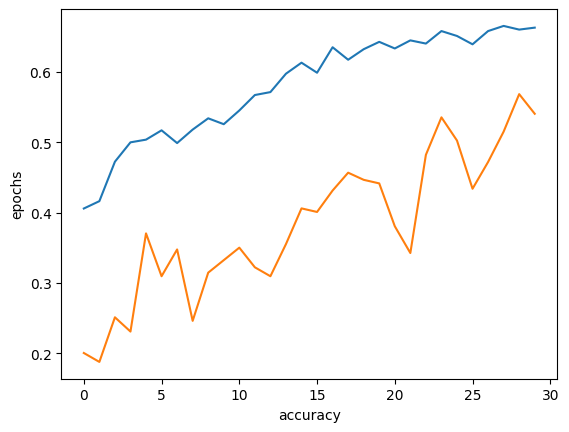

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.title('')

Text(0.5, 1.0, '')

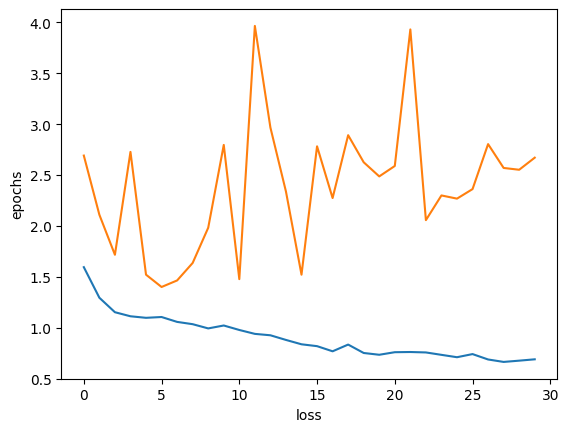

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('epochs')
plt.title('')